## Predicting party affiliation in the U.S. House of Representatives based on voting patterns

<img src="https://images.unsplash.com/photo-1562648257-149a12bd51d7?q=80&w=1776&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D" alt="drawing" style="width:500px;"/>

### Part 1. Preparing the dataset

In [1]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
congressional_voting_records = fetch_ucirepo(id=105)

# data (as pandas dataframes)
voting_record = congressional_voting_records.data.features
party_affiliation = congressional_voting_records.data.targets

In [2]:
voting_record

,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,n,n,y,y,y,y,n,n,y,y,n,y,y,y,n,y
431,n,n,y,n,n,n,y,y,y,y,n,n,n,n,n,y
432,n,NaN,n,y,y,y,n,n,n,n,y,y,y,y,n,y
433,n,n,n,y,y,y,NaN,NaN,NaN,NaN,n,y,y,y,n,y


In [3]:
party_affiliation

,Class
0,republican
1,republican
2,democrat
3,democrat
4,democrat
...,...
430,republican
431,democrat
432,republican
433,republican


In [4]:
# keep 5 voting sessions and combine party affiliation with the voting record
voting_record = voting_record[['water-project-cost-sharing','physician-fee-freeze','el-salvador-aid','aid-to-nicaraguan-contras','education-spending']]
votes = voting_record.copy()
votes['party-affiliation'] = party_affiliation['Class']

In [5]:
# replaces all 'y' (yea) to '1', 'n' (nay) to '0', 'republican' to '0', and 'democrat' to '1'
votes[:][votes == 'y'] = 1.0
votes[:][votes == 'n'] = 0.0
votes[:][votes == 'republican'] = 0.0
votes[:][votes == 'democrat'] = 1.0

# remove all rows that contain NaN (missing data or third party representatives)
votes = votes.dropna()
votes

,water-project-cost-sharing,physician-fee-freeze,el-salvador-aid,aid-to-nicaraguan-contras,education-spending,party-affiliation
0,1.0,1.0,1.0,0.0,1.0,0.0
1,1.0,1.0,1.0,0.0,1.0,0.0
5,1.0,0.0,1.0,0.0,0.0,1.0
6,1.0,1.0,1.0,0.0,0.0,1.0
7,1.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...
426,0.0,0.0,0.0,1.0,0.0,1.0
427,0.0,1.0,1.0,1.0,1.0,0.0
430,0.0,1.0,1.0,0.0,1.0,0.0
431,0.0,0.0,0.0,1.0,0.0,1.0


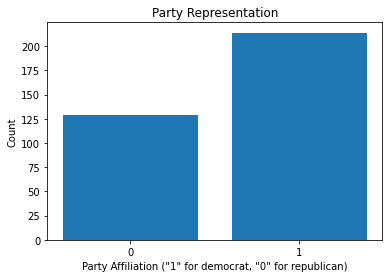

In [6]:
# create a histogram for the party representation in the modified dataset

import matplotlib.pyplot as plt

plt.hist(votes['party-affiliation'], bins=[-0.5, 0.5, 1.5], rwidth=0.8, align='mid')
plt.title('Party Representation')
plt.xlabel('Party Affiliation ("1" for democrat, "0" for republican)')
plt.ylabel('Count')
plt.xticks([0, 1], ['0', '1'])

# Display the plot
plt.show()

While we have more data on voting records for democrats, we still have sufficient data for both parties.

Split the data into Training Data and Test Data. We have 343 rows, so we can select the first 270 rows for training, and the remaining 73 rows for testing the model. 

In [7]:
train = votes.head(270)
test = votes.tail(73)

### Part 2. Training

We are going to use linear regression to model the relation between the voting history and party affiliation. After implmenting the model, we will check if it is sufficiently reliable. 

In [8]:
# using scikit-learn library
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

In [9]:
# we are going to predict the party affiliation based on the voting pattern throughout 5 voting sessions:
predictors = ['education-spending',
              'aid-to-nicaraguan-contras',
              'el-salvador-aid',
              'physician-fee-freeze',
              'water-project-cost-sharing']
target = 'party-affiliation'

#training the model
reg.fit(train[predictors], train[target])

LinearRegression()

In [10]:
# feed the Test Data to our model to generate predictions for 'party-affiliation'
predictions = reg.predict(test[predictors])

# add the predictions to the Test dataframe for comparison to real values
test = test.copy()
test['predictions'] = predictions
test

,water-project-cost-sharing,physician-fee-freeze,el-salvador-aid,aid-to-nicaraguan-contras,education-spending,party-affiliation,predictions
344,0.0,0.0,0.0,1.0,0.0,1.0,0.990559
345,0.0,1.0,1.0,0.0,1.0,0.0,0.023911
346,0.0,1.0,1.0,0.0,1.0,0.0,0.023911
347,0.0,1.0,1.0,0.0,1.0,0.0,0.023911
348,0.0,0.0,0.0,1.0,1.0,1.0,0.896182
...,...,...,...,...,...,...,...
426,0.0,0.0,0.0,1.0,0.0,1.0,0.990559
427,0.0,1.0,1.0,1.0,1.0,0.0,0.047930
430,0.0,1.0,1.0,0.0,1.0,0.0,0.023911
431,0.0,0.0,0.0,1.0,0.0,1.0,0.990559


In [11]:
# the representative can be either a democrat ('1') or a republican ('0'), so the predictions need to be rounded
test['predictions'] = test['predictions'].round()
test

,water-project-cost-sharing,physician-fee-freeze,el-salvador-aid,aid-to-nicaraguan-contras,education-spending,party-affiliation,predictions
344,0.0,0.0,0.0,1.0,0.0,1.0,1.0
345,0.0,1.0,1.0,0.0,1.0,0.0,0.0
346,0.0,1.0,1.0,0.0,1.0,0.0,0.0
347,0.0,1.0,1.0,0.0,1.0,0.0,0.0
348,0.0,0.0,0.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...
426,0.0,0.0,0.0,1.0,0.0,1.0,1.0
427,0.0,1.0,1.0,1.0,1.0,0.0,0.0
430,0.0,1.0,1.0,0.0,1.0,0.0,0.0
431,0.0,0.0,0.0,1.0,0.0,1.0,1.0


### Part 3. Model Accuracy Evaluation

We will use Mean Absolute Error method to evaluate the accuracy of the model.

In [12]:
from sklearn.metrics import mean_absolute_error
error = mean_absolute_error(test['party-affiliation'], test['predictions'])
error

0.0958904109589041

Therefore, the model was on average 0.096 off of the actual value for party affiliation. Considering that the only two possible values for the party affiliation are 1 for democrats and 0 for republicans, MAE of 0.096 (<10% of 1) indicates high accuracy of our model.